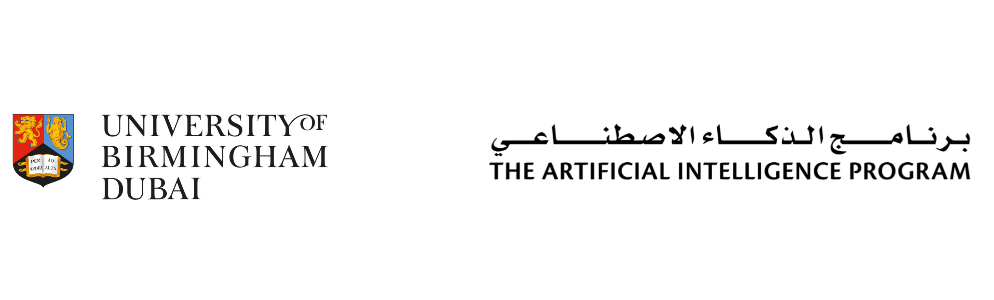

# Perceptrons

n this exercise, we will try out some simple Python code to implement perceptrons (single artificial neurons) and show how we can link them together to form a neural network.

Conceptually, a perceptron is a model that is analagous to a biological neuron. The basic function of a biological neuron is to add up its inputs and to produce an output if the sum is greater than some value, known as the threshold value. The inputs to a neuron arrive alonge dendrites, which are connected to the output of other neurons via specialised junctions called synapses. These junctions alter the effectiveness with which the signal is passed between neurons. Some synapses are good junctions and pass a larger signal than others. The cell body of a neuron receives these input signals and fires if the input exceeds some threshold value.

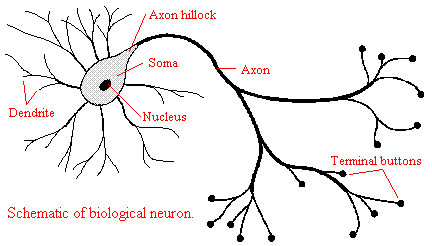

The efficiency of the synapses is modelled by having a multiplicative factor applied to each of the inputs to the neuron, termed a multiplicative weight.

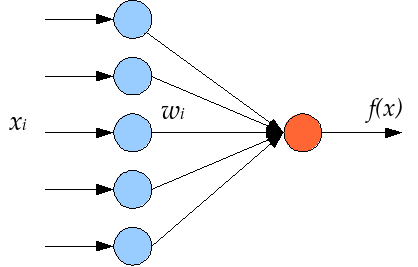

These model neurons were given the name perceptron by Frank Rosenblatt in 1962.

## Step Function

In [ ]:
# The step function gives an output of 1 when the input exceeds a certain threshold.
def step_function(x, threshold):
    if x < threshold:
        return 0
    elif x >= threshold:
        return 1

## One-Input Perceptron:

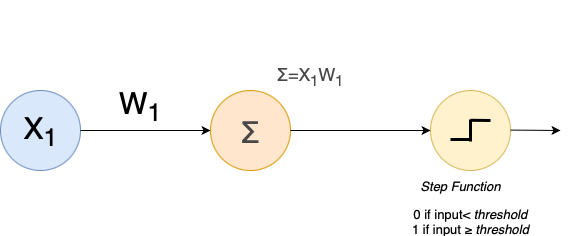

In [ ]:
class Perceptron1():
    """This class implements a 1-input perceptron."""

    def __init__(self, w1, threshold, activation_function):
        self.w1 = w1
        self.threshold = threshold
        self.activation_function = activation_function

    def activate(self, x1):
        output = self.activation_function(x1 * self.w1, self.threshold)
        return output

In [ ]:
w1 = 0.5
threshold = 0.5

p1 = Perceptron1(w1, threshold, step_function)

input1 = 0.75
p1.activate(input1)

**<font color="red">EXERCISE 1</font>**

Play around with the weight and threshold parameters of the 1-input perceptron.

In [ ]:
p1.w1 = None
p1.threshold = None
test_input = 1
p1.activate(test_input)

## Two-Input Perceptron

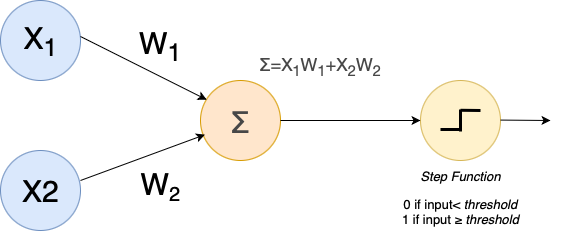

In [ ]:
class Perceptron2():
    """This class implements a 2-input perceptron."""

    def __init__(self, w1, w2, threshold, activation_function):
        self.w1 = w1
        self.w2 = w2
        self.threshold = threshold
        self.activation_function = activation_function

    def activate(self, x1, x2):
        output = self.activation_function(sum([x1 * self.w1, x2 * self.w2]), self.threshold)
        return output

In [ ]:
w1 = 0.1
w2 = 0.1
threshold = 0.5
p2 = Perceptron2(w1, w2, threshold, step_function)

input1 = 0
input2 = 1
p2.activate(input1, input2)

**<font color="red">EXERCISE 2</font>**

Play around with the weight and threshold parameters of the 2-input perceptron.

In [ ]:
p2.w1 = None
p2.w2 = None
p2.threshold = None

input1 = 1
input2 = 1
p2.activate(input1, input2)

## Modeling Specific Tasks Using Perceptrons

### Modelling the "and" logical operator

This is what the "and" truth table looks like.

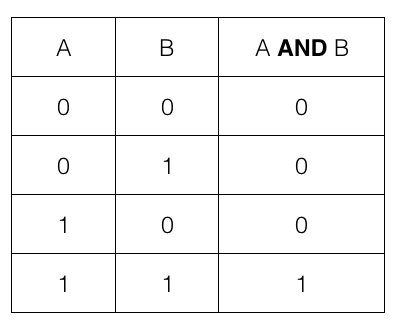

It takes two inputs and returns one output. The output is 1 only when both inputs are 1.

**CHECK OUT THE DESMOS VISUALIZATION [HERE](https://www.desmos.com/calculator/gzemzqlfoz)**




In [ ]:
weight1 = 1
weight2 = 1
threshold = 2

and_perceptron = Perceptron2(weight1, weight2, threshold, step_function)
print("false and false == false", and_perceptron.activate(0, 0))
print("false and true == false", and_perceptron.activate(0, 1))
print("true and false == false", and_perceptron.activate(1, 0))
print("true and true == true", and_perceptron.activate(1, 1))


### Modelling the "or" logical operator

This is what the "or" truth table looks like.

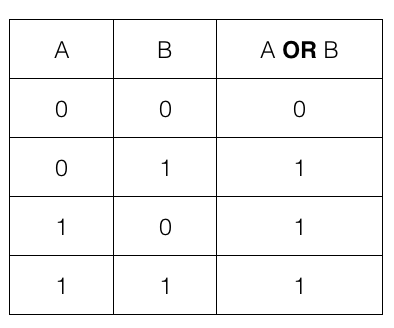

It takes two inputs and returns one output. The output is 1 when either or both of the inputs are 1.

**CHECK OUT THE DESMOS VISUALIZATION [HERE](https://www.desmos.com/calculator/gogojvjkym)**

**<font color="red">EXERCISE 3</font>**

Set weight1, weight2, and threshold to create an or_perceptron (hint: use the DESMOS visualization to help you).

If your solution is correct, you should see:
```
false or false == false 0
false or true == true 1
true or false == true 1
true or true == true 1
```

In [ ]:
weight1 = None
weight2 = None
threshold = None

or_perceptron = Perceptron2(weight1, weight2, threshold, step_function)
print("false or false == false", or_perceptron.activate(0, 0))
print("false or true == true", or_perceptron.activate(0, 1))
print("true or false == true", or_perceptron.activate(1, 0))
print("true or true == true", or_perceptron.activate(1, 1))

### Modelling the "not" logical operator

This is what the "not" truth table looks like

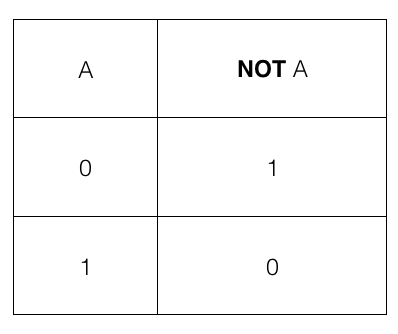

It takes one input. The output is the opposite of the input.

**CHECK OUT THE DESMOS VISUALIZATION [HERE](https://www.desmos.com/calculator/klg4qe0yfk)**

**<font color="red">EXERCISE 4</font>**

Set weight1, weight2, and threshold to create a not_perceptron (hint: use the DESMOS visualization to help you).

If your solution is correct, you should see:
```
not false == true 1
not true == false 0
```

In [ ]:
weight1 = -1
threshold = -0.5

not_perceptron = Perceptron1(weight1, threshold, step_function)
print("not false == true", not_perceptron.activate(0))
print("not true == false", not_perceptron.activate(1))

### Modelling the "xor" function

Can you implement the ```xor``` function?

The definition of ```a xor b``` is:

1, if a and b are different
0, if a and b are the same

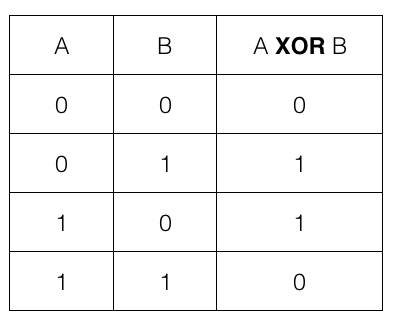

**CHECK OUT THE DESMOS VISUALIZATION [HERE](https://www.desmos.com/calculator/kkjjy2eaza)**

So it seems there is no hope of using perceptrons to recreate an XOR gate. Except wait! We just created an AND, OR, and a NOT gate out of perceptrons. While we won’t prove it, any logical circuit can be recreated from this universal set of gates. It is therefore possible to recreate the XOR gate from multiple perceptrons.

In fact, we can recreate any function using enough perceptrons. Thus, the birth of the Multi-Layer Perceptron (MLP).

In [ ]:
def xor_net(input1, input2):
    not_input1 = not_perceptron.activate(input1)
    not_input2 = not_perceptron.activate(input2)

    and_output1 = and_perceptron.activate(input1, not_input2)
    and_output2 = and_perceptron.activate(not_input1, input2)

    output = or_perceptron.activate(and_output1, and_output2)

    return output

print("false xor false == false", xor_net(0, 0))
print("false xor true == true", xor_net(0, 1))
print("true xor false == true", xor_net(1, 0))
print("true xor true == false", xor_net(1, 1))

# Introduction to Neural Networks

## Importing Libraries & Functions

In [ ]:
# Import libraries
import numpy as np # NumPy is used for performing fast, efficient numerical operations on collections of data
import pandas as pd # Pandas allows you to create dataframes (tables) to view and manipoulate your data

from sklearn.model_selection import train_test_split # This is a function that divides your data into train, test splits
from sklearn.model_selection import KFold # These functions allow you to perform cross-validation

import matplotlib.pyplot as plt # This is a famous library that enables you to plot graphs and visualizations

## Exploratory Data Analysis

**Customer churn** refers to the phenomenon where customers discontinue their relationship or subscription with a company or service provider. It represents the rate at which customers stop using a company's products or services within a specific period. Churn is an important metric for businesses as it directly impacts revenue, growth, and customer retention.

In the context of the Churn dataset, **the churn label indicates whether a customer has decided to discontinue their subscription or usage of the company's services**. On the other hand, a non-churned customer is one who continues to remain engaged and retains their relationship with the company.

You can learn more about the dataset from [here](https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset/data).

### Loading the dataset

**DOWNLOAD THE DATASET [HERE](https://drive.google.com/file/d/1U8tNuzD8mIQSUAdJweooZ_sAJa7c4FJ1/view?usp=sharing)**

In [ ]:
import seaborn as sns
import warnings
from IPython.display import display

# Turn off warnings
warnings.filterwarnings("ignore")

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# Load datasets
df = pd.read_csv("customer_churn_dataset.csv")

# ---- MISSING DATA ----
missing_df = (
    df.isnull()
    .sum()
    .reset_index()
    .rename(columns={"index": "Feature", 0: "Missing Values"})
)
missing_df["Missing %"] = (missing_df["Missing Values"] / len(df)) * 100
missing_df = missing_df[missing_df["Missing Values"] > 0].sort_values("Missing %", ascending=False)

print("\nMissing Data Summary:")
display(missing_df.style.background_gradient(cmap="Reds").format({"Missing %": "{:.2f}"}))

# ---- CHURN DISTRIBUTION (Train & Test) ----
def plot_churn_distribution(df, dataset_name):
  # Compute counts and percentages
  vc = df["Churn"].value_counts()
  churn_dist = pd.DataFrame({
      "Churn": vc.index,
      "Count": vc.values
  })
  churn_dist["Percent"] = churn_dist["Count"] / churn_dist["Count"].sum() * 100

  # Plot
  plt.figure()
  ax = sns.barplot(data=churn_dist, x="Churn", y="Count", palette="Set2")

  # Add percentage labels at the top of each bar
  for bar, pct in zip(ax.patches, churn_dist["Percent"]):
      height = bar.get_height()
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          height,
          f"{pct:.1f}%",
          ha="center",
          va="bottom",
          fontsize=12,
          fontweight="bold"
      )

# Call for both sets
plot_churn_distribution(df, "Total")

### Exploring the Dataset

In [ ]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# Drop CustomerID
df_filtered = df.drop(columns=["CustomerID"])

# Identify feature columns (everything except the target)
features = [col for col in df_filtered.columns if col != "Churn"]

# Loop over features and plot each vs. Churn
for feature in features:
    plt.figure()

    # Numeric features → boxplot of feature by Churn
    if pd.api.types.is_numeric_dtype(df_filtered[feature]):
        sns.boxplot(
            x="Churn",
            y=feature,
            data=df_filtered,
            palette="Set2"
        )
        plt.title(f"{feature} distribution by Churn")
        plt.xlabel("Churn")
        plt.ylabel(feature)

    # Categorical features → side-by-side bar chart of counts
    else:
        counts = (
            df_filtered
            .groupby([feature, "Churn"])
            .size()
            .unstack(fill_value=0)
        )
        counts.plot(
            kind="bar",
            rot=45,
            figsize=(8,5)
        )
        plt.title(f"{feature} counts by Churn")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.legend(title="Churn")

    plt.tight_layout()
    plt.show()


In [ ]:
import plotly.express as px

# Sample 250, 100 from each class
df_churn_1 = df[df['Churn'] == 1].sample(n=250, random_state=42)
df_churn_0 = df[df['Churn'] == 0].sample(n=100, random_state=42)

# Combine the samples
df_sampled = pd.concat([df_churn_1, df_churn_0], ignore_index=True)

# Create 3D scatter plot
fig = px.scatter_3d(
    df_sampled,
    x='Support Calls',
    y='Total Spend',
    z='Payment Delay',
    color='Churn',
    title='3D Scatter Plot: Support Calls vs Total Spend vs Payment Delay (Sampled)',
    opacity=1
)

fig.update_layout(
    width=900,
    height=700,
    scene=dict(
        xaxis_title='Support Calls',
        yaxis_title='Total Spend',
        zaxis_title='Payment Delay'
    )
)

fig.show()

### Preprocessing Steps

There are currently several issues and preprocessing steps we must undertake before we begin training our neural network:
1. There are some features that may not be predictive
2. There is 1 missing value for each feature we must handle.
3. Split data into train and test set
4. There are several discrete features we have to preprocess
5. We have continuous values with a large domain and should be normalized appropriately.


#### Feature Engineering

**<font color="red">EXERCISE 5</font>**

Fill in the following preprocessing steps.

In [ ]:
# Load datasets
df = pd.read_csv("customer_churn_dataset.csv")

print(df.head())

# -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 1: Drop CustomerID as a feature as it does not help prediction -=-=-=-=-=-=-=-=-=-=-=-=-=-
df = None

# -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 2: Dropping Any Rows with NA/Missing Data (Handling Missing Data) -=-=-=-=-=-=-=-=-=-=-=-=-=-

# Drop any row with at least one NaN
df = None

# -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 3: SPLIT: 80% train, 20% test (set stratify=df["Churn"] and random_state=42) -=-=-=-=-=-=-=-=-=-=-=-=-=-
train_df, test_df = None

print(f"Train shape before preprocessing: {train_df.shape}")
print(f"Test shape after preprocessing: {test_df.shape}\n")

# -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 4: Discretize 'Gender' Using One-Hot-Encoding. This should create new 'Gender_Female' and 'Gender_Male' columns and remove the old 'Gender' column -=-=-=-=-=-=-=-=-=-=-=-=-=-
# Create dummies for Gender in train and test, ensuring the same columns

# Create dummies
train_gender = pd.get_dummies(train_df['Gender'], prefix='Gender')
test_gender  = pd.get_dummies(test_df['Gender'],  prefix='Gender')

# Figure out all the dummy columns we need
gender_cols = sorted(set(train_gender.columns).union(test_gender.columns))

# Reindex both to that full set, filling missing with 0
train_gender = train_gender.reindex(columns=gender_cols, fill_value=0).astype(int)
test_gender  = test_gender.reindex(columns=gender_cols,  fill_value=0).astype(int)

# Drop the original “Gender” and concat the new dummies
train_df = pd.concat([train_df.drop(columns=['Gender']), train_gender], axis=1)
test_df  = pd.concat([test_df .drop(columns=['Gender']), test_gender ], axis=1)

# Discretize 'Subscription Type' using the ordinal encoding schema
subscription_map = {
    'Basic': 0,
    'Standard': 1,
    'Premium': 2
}

train_df['Subscription Type'] = train_df['Subscription Type'].map(subscription_map)
test_df['Subscription Type']  = test_df['Subscription Type'].map(subscription_map)

# -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 5: Discretize 'Contract Length' using the provided ordinal encoding schema -=-=-=-=-=-=-=-=-=-=-=-=-=-

contract_map = {
    'Monthly': 0,
    'Quarterly': 1,
    'Annual': 2
}

train_df['Contract Length'] = None
test_df['Contract Length']  = None

# -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 6: Z-Normalize Numeric Features (Standard Normalization) -=-=-=-=-=-=-=-=-=-=-=-=-=-

# List of numerical columns to normalize
numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

# Compute mean and std from training data
train_means = None
train_stds  = None

# Apply z-normalization
train_df[numeric_cols] = None
test_df[numeric_cols]  = None

print("-=" * 100)
print(f"Train shape after preprocessing: {train_df.shape}")
print(f"Test shape after preprocessing: {test_df.shape}\n")

print(train_df.head())

#### Train-Validation-Split

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Separate features and labels
X_train = train_df.drop(columns=['Churn'])  # Adjust if your target column has a different name
y_train = train_df['Churn']
X_test = test_df.drop(columns=['Churn'])  # Adjust if your target column has a different name
y_test = test_df['Churn']

# Create Validation Split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.125, stratify=y_train, random_state=42)

# 70% Train, 10% Validation, 20% Test

## Model

### Evaluate Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from IPython.display import display
import seaborn as sns

# Range of hyperparameters to iterate over
C_range = [0.01, 0.1, 0.5, 1, 5, 10]

logreg_results = []

for C in C_range:
    logreg_model = LogisticRegression(max_iter=2000, C=C, random_state=42)

    # Train the model
    logreg_model.fit(X_tr, y_tr)

    # Validation predictions
    y_val_pred = logreg_model.predict(X_val)
    y_val_proba = logreg_model.predict_proba(X_val)[:, 1] if len(set(y_tr)) == 2 else None

    # Metrics
    acc = accuracy_score(y_val, y_val_pred)
    auroc = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else None

    logreg_results.append({
        'C': C,
        'val_accuracy': acc,
        'val_auroc': auroc
    })

# Convert to DataFrame and sort
logreg_df = pd.DataFrame(logreg_results)
logreg_df = logreg_df.sort_values(by='val_accuracy', ascending=False)

# Display table
display(logreg_df)

# Select best C
best_C = logreg_df.iloc[0]['C']
print(f"\n✅ Best C found: {best_C} with Validation Accuracy = {logreg_df.iloc[0]['val_accuracy']:.4f}")

# Train final model with best C
final_model = LogisticRegression(max_iter=2000, C=best_C, random_state=42)
final_model.fit(X_tr, y_tr)

# Test performance
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1] if len(set(y_tr)) == 2 else None

test_auroc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

print(f"\n🎯 Test Set Performance with C={best_C}")
if test_auroc is not None:
    print(f"Test AUROC: {test_auroc:.4f}")
print("\n===== Confusion Matrix =====")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = final_model.classes_  # Automatically gets class labels

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n===== Classification Report =====")
print(classification_report(y_test, y_test_pred))


### Multi-Layer Perceptron

Now that we’ve seen the limitations of simple linear classifiers like logistic regression, let’s move to something more powerful: the Multi-Layer Perceptron (MLP).

An MLP is a type of feedforward neural network composed of multiple layers of interconnected "neurons." Unlike single-layer models (like logistic regression or basic perceptrons), MLPs can capture complex, non-linear relationships in the data, making them well-suited for problems like churn prediction where patterns aren’t linearly separable.

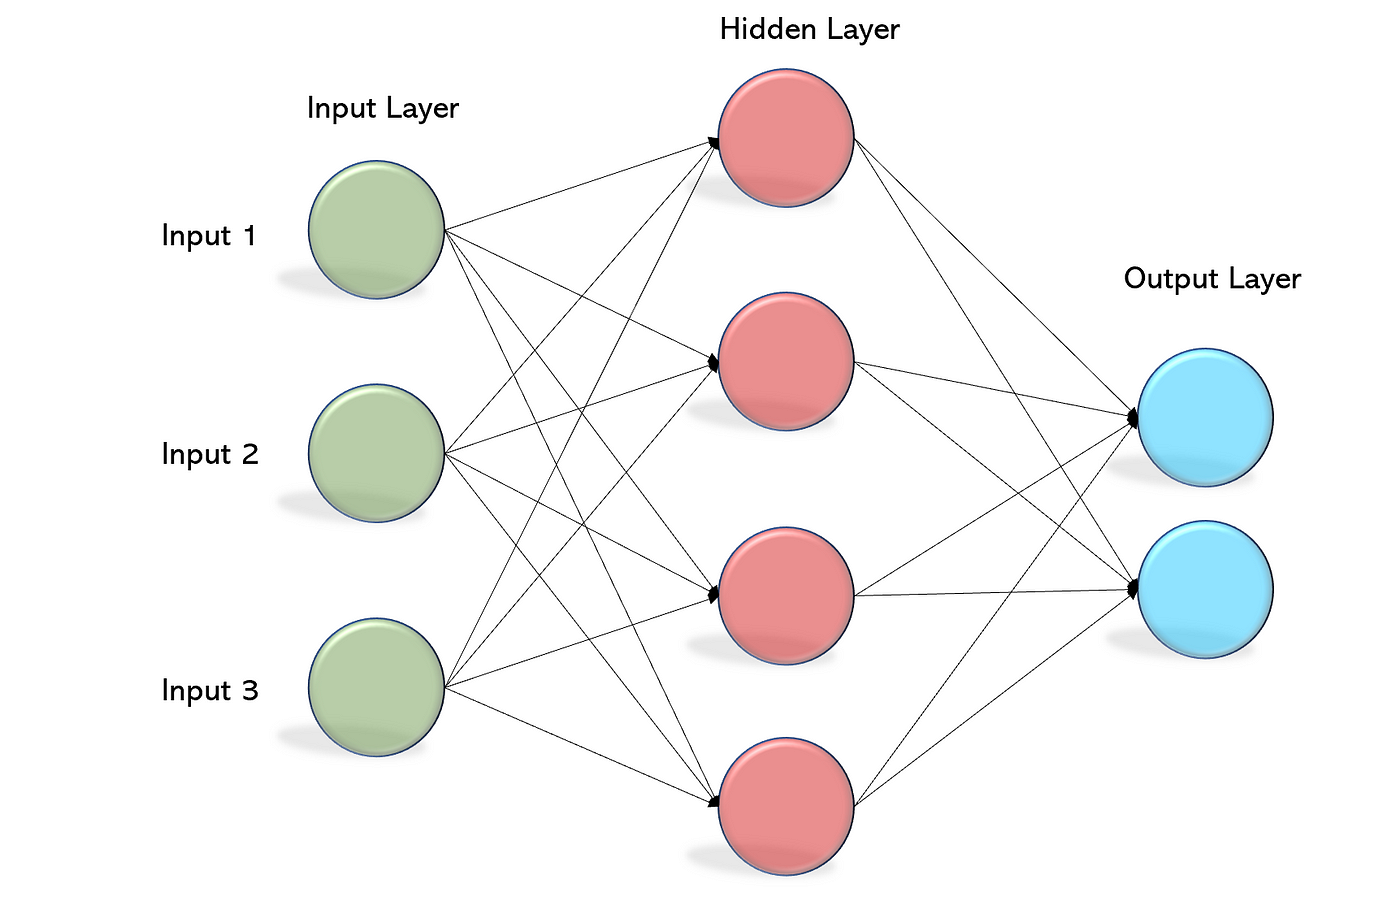

An MLP consists of:
1. Input layer: One neuron per feature.
2. Hidden layers: One or more layers that transform the data through learned weights and activation functions.
3. Output layer: One or more neurons depending on the classification task (binary or multi-class).


**Common Parameters You Can Tune**

When training an MLP, several parameters (also called hyperparameters) can be adjusted to improve performance:
- Number of layers: More layers allow the model to learn more complex patterns.
- Neurons per layers: Controls the “width” of the model; more neurons increase capacity.
- Activation function: Functions like ReLU, sigmoid, or tanh introduce non-linearity.
- Learning rate: Determines how fast the model updates during training.
- Batch size: The number of samples processed before updating weights.
- Epochs: Number of times the full training set is passed through the model.
- Regularization: Techniques (like L1/L2 penalties) to prevent overfitting.

These parameters can be explored and tuned either manually or through automated methods like grid search or the Loop Parameters operator in RapidMiner.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# ---------------- Define and Train MLP Model ----------------
model = MLPClassifier(
    hidden_layer_sizes=(5,), # The network has 1 hidden layer with 5 neurons
    max_iter=20, # We will train for 20 epochs (the model will see each data point 20 times)
    early_stopping=True, # If the validation loss starts to increase (we are starting to overfit), we will end the training
    n_iter_no_change=3, # If the validation loss keeps increasing for 3 epochs, end the training
    validation_fraction=0.125, # Calculate validation loss on 12.5% of the passed in data
    random_state=42, # Set random_state to 42 to ensure reproducibility
    verbose=True # Verbose allows the model to report its validation loss and score at each epoch (iteration)
)

# Train the model
model.fit(X_tr, y_tr)

# ---------------- Evaluate on Test Set ----------------
print("\n===== Test Set Performance =====")
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1] if len(set(y_tr)) == 2 else None

test_auroc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

if test_auroc is not None:
    print(f"Test AUROC: {test_auroc:.4f}")
print("\n===== Confusion Matrix =====")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = final_model.classes_  # Automatically gets class labels

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n===== Classification Report =====")
print(classification_report(y_test, y_test_pred))


**<font color="red">EXERCISE 6</font>**

Find the optimal hyperparameters for the MLP by varying the number and structure of hidden layers, the learning rates, and the activation functions.

Fit your training data on the most optimal model and test it on the test data.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import itertools
from IPython.display import display

# Define hyperparameter grid
hidden_layer_sizes_range = [
    (8,),
    (8, 8, 5, 5, 3),
    (8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 3)
]
learning_rate_range = [0.1, 0.01, 0.001]
activation_function_range = ['tanh', 'relu']

results = []

# Iterate through all hyperparameter combinations
for hls, lr, af in itertools.product(hidden_layer_sizes_range, learning_rate_range, activation_function_range):
  print(f"Training with hls: {hls}, lr: {lr}, af: {af}..")
  # -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 1: Initialize the model with the currently selected hyperparameters. -=-=-=-=-=-=-=-=-=-=-=-=-=-
  model = MLPClassifier(
      hidden_layer_sizes=None,
      learning_rate_init=None,
      activation=None,
      max_iter=20,
      early_stopping=True,
      n_iter_no_change=3,
      validation_fraction=0.125,
      random_state=42,
      verbose=False
  )
  # -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 2: Fit the model on the training data. -=-=-=-=-=-=-=-=-=-=-=-=-=-
  pass

  # -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 3: Test the fitted model on the validation data  -=-=-=-=-=-=-=-=-=-=-=-=-=-
  y_val_pred = None

  y_val_proba = model.predict_proba(X_val)[:, 1] if len(set(y_tr)) == 2 else None

  # Calculate metrics
  # -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 4: Calculate the validation accuracy  -=-=-=-=-=-=-=-=-=-=-=-=-=-
  acc = None

  # Calculating the Area under the Curve of the Receiver Operating Curve
  auroc = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else None

  results.append({
      'hidden_layers': hls,
      'learning_rate': lr,
      'activation': af,
      'val_accuracy': acc,
      'val_auroc': auroc
  })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_accuracy', ascending=False)

# Display top results
display(results_df)

# Select best model
best_params = results_df.iloc[0]
best_hls = best_params['hidden_layers']
best_lr = best_params['learning_rate']
best_af = best_params['activation']

  # -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 5: Initialize the model with the best hyperparameters (best_hls, best_lr, best_af). -=-=-=-=-=-=-=-=-=-=-=-=-=-
final_model = MLPClassifier(
    hidden_layer_sizes=None,
    learning_rate_init=None,
    activation=None,
    max_iter=20,
    early_stopping=True,
    n_iter_no_change=3,
    validation_fraction=0.125,
    random_state=42,
    verbose=False
)

final_model.fit(X_tr, y_tr)

# -=-=-=-=-=-=-=-=-=-=-=-=-=- TO DO 6: Test the fitted model on the test data  -=-=-=-=-=-=-=-=-=-=-=-=-=-
y_test_pred = final_model.predict(X_test)

y_test_proba = final_model.predict_proba(X_test)[:, 1] if len(set(y_tr)) == 2 else None

test_acc = accuracy_score(y_test, y_test_pred)
test_auroc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None

print(f"\n🎯 Test Set Performance using Best MLP Parameters:")
print(f"Hidden Layers: {best_hls}, Learning Rate: {best_lr}, Activation: {best_af}")
print(f"Test Accuracy: {test_acc:.4f}")
if test_auroc is not None:
    print(f"Test AUROC: {test_auroc:.4f}")
print("\n===== Test Set Confusion Matrix =====")
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = final_model.classes_  # Automatically gets class labels

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\n===== Test Set Classification Report =====")
print(classification_report(y_test, y_test_pred))



# Resource for Visualizing Neural Networks

Try It Yourself: TensorFlow Playground

To build intuition for how MLPs work, try experimenting with different neural network architectures using this interactive tool:

**👉 [Playground Tensor Flow's Neural Network Visualization](https://playground.tensorflow.org/#activation=relu&batchSize=1&dataset=spiral&regDataset=reg-plane&learningRate=0.01&regularizationRate=0.001&noise=0&networkShape=4,2,2&seed=0.32348&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)**

Start with 1 hidden layer and adjust the neurons, activation functions, and learning rate. You’ll see how the decision boundary adapts and how training accuracy changes based on your settings.
